# ML Project

In [31]:
# Import Libraries
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Import features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
# Import data from seaborn library
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
# create a folder inside ML-Project for your data
os.makedirs('./data', exist_ok=True)

In [35]:
# Save the data as csv file inside the data folder
df.to_csv('./data/tips.csv', index=False)

In [36]:
# Split the data into x and y
x = df.drop('tip', axis=1) # Features
y = df['tip'] # Target

In [37]:
x.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [38]:
# create a lable encoder object
le = LabelEncoder()

# Encode sex, smoker, day and time
x["sex"] = le.fit_transform(x["sex"])
x["smoker"] = le.fit_transform(x["smoker"])
x["day"] = le.fit_transform(x["day"])
x["time"] = le.fit_transform(x["time"])

x.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [39]:
# Split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [40]:
# Train the Model RF

# Call the model

rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()

# Fit the model
rf_model.fit(x_train, y_train)



,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
# Train the Model xgboost

# Call the model
xgb_model = XGBRegressor()

# Fit the model
xgb_model.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


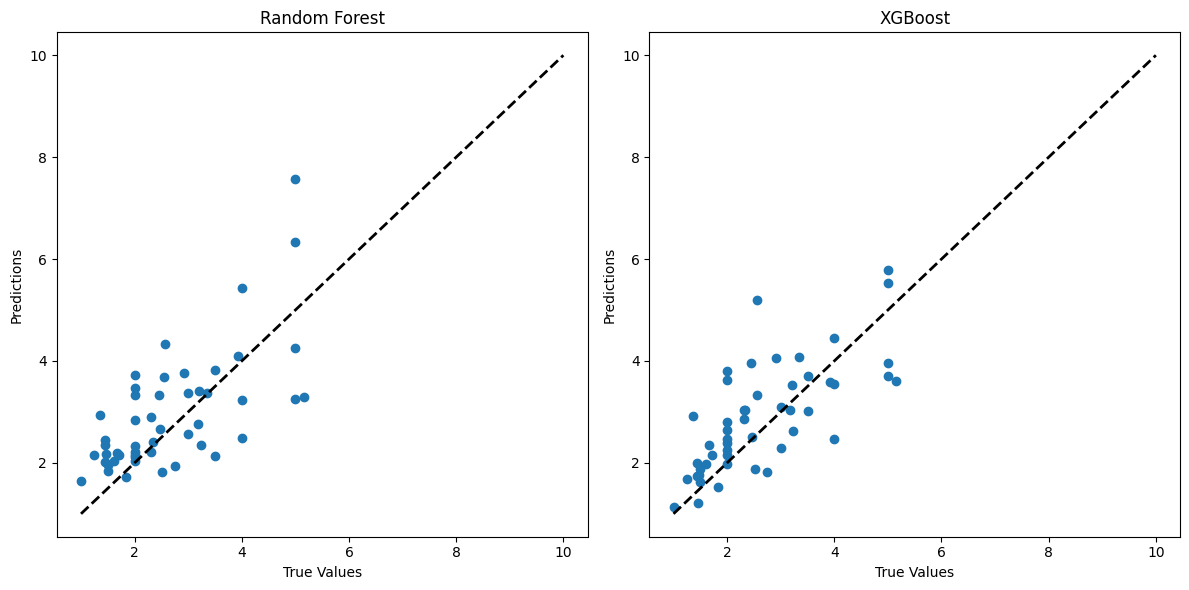

In [42]:
# Predicting with the models
rf_predictions = rf_model.predict(x_test)
xgb_predictions = xgb_model.predict(x_test)

# Plot

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest")

plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("XGBoost")

plt.tight_layout()
plt.show()

In [43]:
# Validate the models based on matrices

# Random Forest
print("Random Forest")
print("MAE:", mean_absolute_error(y_test, rf_predictions))
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R2:", r2_score(y_test, rf_predictions))

# XGBoost
print("XGB")
print("MAE:", mean_absolute_error(y_test, xgb_predictions))
print("MSE:", mean_squared_error(y_test, xgb_predictions))
print("R2:", r2_score(y_test, xgb_predictions))


Random Forest
MAE: 0.7770326530612246
MSE: 0.9476849767346949
R2: 0.24183463859496312
XGB
MAE: 0.6721697168934103
MSE: 0.7389215578875857
R2: 0.40884920227805865


In [47]:
# Working with XGBoost

# Save the model
import joblib
# create a folder named "models"
if not os.path.exists('./models'):
    os.makedirs('./models')

joblib.dump(xgb_model, './models/xgb_model.pkl')

['./models/xgb_model.pkl']

In [ ]:
# Save the XGBoost model
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('./models', exist_ok=True)

# Save the model
model_path = './models/xgb_model.pkl'
joblib.dump(xgb_model, model_path)
print(f"Model saved to: {os.path.abspath(model_path)}")

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [55]:
# predict specific value
xgb_model.predict([[70, 1, 0, 3, 1, 4]])

array([10.077904], dtype=float32)